<a href="https://colab.research.google.com/github/SoltanReza/classification/blob/main/Projet_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prérequis

### Installation

In [ ]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')
import sys
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/ML_FDS'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%pwd

!pip install autokeras
!pip install umap-learn[plot]
!pip install holoviews
!pip install  ipykernel
!pip install joblib
!pip install scikeras
!pip install scikit-learn==1.3.2 scikeras==0.12.0
# !pip install scikit-learn scikeras

# eventuellement ne pas oublier de relancer le kernel du notebook
# !pip uninstall tensorflow
!pip install tensorflow==2.15.0

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import classification_report
import autokeras as ak

# librairies générales
import joblib
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
import random
from numpy import mean
from numpy import std
import numpy as np

from google.colab import auth
import google.auth

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# TensorFlow et keras
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import os
from os import listdir
from os.path import isfile, join
import cv2
import glob
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload, MediaFileUpload
import io
import tempfile
from skimage.feature import hog
from sklearn.svm import SVC
import numpy as np

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, GridSearchCV
from tensorflow.keras.applications import ResNet50


### Utils

In [ ]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)
  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(confusion_matrix,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top')
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()


def plot_kfold_results(accuracies, k, model_name="CNN-KFOLD"):

    folds = list(range(1, k + 1))
    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)

    plt.figure(figsize=(10, 5))
    plt.bar(folds, accuracies, yerr=[std_acc] * len(folds), capsize=5, color='lightblue', alpha=0.7)
    plt.axhline(y=mean_acc, color='red', linestyle='--', label=f'Moyenne: {mean_acc*100:.2f}%')
    plt.title(f"Performance de {model_name} (k-fold, k={k})")
    plt.xlabel("Fold")
    plt.ylabel("Accuracy de validation")
    plt.xticks(folds)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    for i, acc in enumerate(accuracies):
        plt.text(folds[i], acc + 0.01, f"{acc*100:.2f}%", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()



def plot_curves(histories):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                        top = 0.9, wspace = 0.25, hspace = 0)
  for i in range(len(histories)):
    # plot loss
    plt.subplot(121)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='red', label='test')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    # plot accuracy
    plt.subplot(122)
    plt.title('Classification Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='red',
                label='test')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
  plt.show()

def authenticate_google_drive():
    auth.authenticate_user()
    service = build('drive', 'v3')
    return service

def download_file_from_drive(file_id):
    service = authenticate_google_drive()
    request = service.files().export_media(fileId=file_id, mimeType='text/csv')
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)

    done = False
    while done is False:
        status, done = downloader.next_chunk()

    fh.seek(0)
    return pd.read_csv(fh)

def upload_file_to_drive(file_id, file_path):
    service = authenticate_google_drive()

    media = MediaFileUpload(file_path, mimetype='text/csv')
    updated_file = service.files().update(fileId=file_id, media_body=media).execute()

    print(f"File updated: {updated_file['name']}")

def append_train_results_to_csv(file_id, train_results):
    try:
        df = download_file_from_drive(file_id)
    except pd.errors.EmptyDataError:
        column_names = list(train_results.keys())
        df = pd.DataFrame(columns=column_names)
    new_row = pd.DataFrame([train_results])
    df = pd.concat([df, new_row], ignore_index=True)

    with tempfile.NamedTemporaryFile(delete=False, mode='w', newline='') as tmpfile:
        temp_path = tmpfile.name
        df.to_csv(temp_path, index=False)

    upload_file_to_drive(file_id, temp_path)


    # Sauvegarder dans Google Drive
    if file_id:
        append_train_results_to_csv(file_id, train_results)
    else:
        print("Aucun file_id fourni, résultats non sauvegardés dans Google Drive.")



def plot_augmented_images(x_train, datagen, num_images=5):
    image_iterator = datagen.flow(x_train, batch_size=num_images, shuffle=False)
    augmented_images = next(image_iterator)

    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        # Image originale
        plt.subplot(2, num_images, i + 1)
        plt.imshow(x_train[i].astype('uint8'))
        plt.title("Original")
        plt.axis('off')
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(augmented_images[i].astype('uint8'))
        plt.title("Augmentée")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


def augment_dataset(x_train, y_train, datagen, augmentation_factor=5):
    num_original = len(x_train)
    img_height, img_width, img_channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    num_augmented = num_original * augmentation_factor

    x_augmented = np.zeros((num_augmented, img_height, img_width, img_channels))
    y_augmented = np.zeros(num_augmented)

    iterator = datagen.flow(x_train, y_train, batch_size=32, shuffle=False)
    i = 0
    while i < num_augmented:
        batch_x, batch_y = next(iterator)
        batch_size = batch_x.shape[0]
        end_idx = min(i + batch_size, num_augmented)
        num_to_add = end_idx - i
        x_augmented[i:end_idx] = batch_x[:num_to_add]
        y_augmented[i:end_idx] = batch_y[:num_to_add]
        i += num_to_add

    x_final = np.concatenate([x_train, x_augmented])
    y_final = np.concatenate([y_train, y_augmented])
    return x_final, y_final

# def create_cnn():
#     model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation=activation, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(64, (3, 3), activation=activation),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(128, (3, 3), activation=activation),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),
#     layers.Dense(128, activation=activation),
#     # layers.Dropout(0.5),
#     layers.Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer=optimizer,
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
#     return model

def visualizer(model,history,x_test,y_test,my_classes,isKfold=False, accuracies=False, k=0):
  if(isKfold == True):
    plot_kfold_results(accuracies, k)

  else:
    y_pred = model.predict(x_test)
    y_pred_classes = []
    for i in y_pred:
        for j in i:
          y_pred_classes.append ((j > 0.5).astype(int))


    cm = confusion_matrix(y_test , y_pred_classes)
    plot_curves_confusion (history,cm,my_classes)



def create_cnn(learning_rate=0.001, filters1=32, filters2=64, filters3=128):
    model = models.Sequential([
        layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(64, 64, 3), name='conv1'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters2, (3, 3), activation='relu', name='conv2'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters3, (3, 3), activation='relu', name='conv3'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

def visualize_feature_maps(model, layer_name, input_image, fold, epoch, display_n=8):
    intermediate_model = tf.keras.Model(inputs=model.input,
                                        outputs=model.get_layer(layer_name).output)

    feature_maps = intermediate_model.predict(input_image, verbose=0)
    feature_maps = feature_maps[0]

    plt.figure(figsize=(20, 10))
    num_features = min(display_n, feature_maps.shape[-1])
    for i in range(num_features):
        plt.subplot(2, 4, i + 1)
        plt.imshow(feature_maps[:, :, i], cmap='viridis')
        plt.title(f'Feature Map {i + 1}')
        plt.axis('off')
    plt.suptitle(f'Fold {fold} - Époque {epoch} - Couche {layer_name}')
    plt.show()


### Les jeux de données


In [ ]:
!wget https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip

In [ ]:

import zipfile
#with zipfile.ZipFile("Tiger-Fox-Elephant.zip","r") as zip_ref:
    #zip_ref.extractall("Data_Project")

**Créer le jeu de données**

Actuellement pour chaque animal nous avons un répertoire qui contient des images positives et un répertoire qui contient des images négatives. Pour pouvoir créer un jeu de données nous devons obtenir X et y. Les fonctions ci-dessous permettent de générer, à partir des répertoires, un jeu de données aléatoire pour X et y.

In [ ]:
def create_training_data(path_data, list_classes):
  training_data=[]
  for classes in list_classes:
      path=os.path.join(path_data, classes)
      class_num=list_classes.index(classes)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass
  return training_data

def create_X_y (path_data, list_classes):
      # récupération des données
      training_data=create_training_data(path_data, list_classes)
      # tri des données
      random.shuffle(training_data)
      # création de X et y
      X=[]
      y=[]
      for features, label in training_data:
        X.append(features)
        y.append(label)
      X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
      y=np.array(y)
      return X,y

def plot_examples(X,y):
  plt.figure(figsize=(15,15))
  for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(X[i]/255.,cmap=plt.cm.binary)
    plt.xlabel('classe ' + str(y[i]))

#Modèles

##Tigre

###Préparation

In [ ]:

IMG_SIZE=64
COLUMNS = 25
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['tiger','Tiger_negative_class']
optimizer = 'adam'
activation='relu'
batch_size=32
epochs=15

X, y =create_X_y(my_path,my_classes)
X=X.astype('float')
# X=X/255.0
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


###Modèle baseline

In [ ]:
isKfold = False
optimizer = 'adam'
activation='relu'
batch_size=32
epochs=15
model_name="CNN_baseline"
print(f"Train: {len(x_train)}, Validation: {len(x_val)}, Test: {len(x_test)}")

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=activation, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation=activation),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())
start_time = time.time()

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
)
training_time = time.time() - start_time

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
visualizer(model,history,x_test,y_test,my_classes)

On peut constater un surapprentissage essayons d'améliorer le modèle

###Modèle baseline kfold

In [ ]:
def create_cnn_baseline( filters1=32):
    model = models.Sequential([
        layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(64, 64, 3), name="conv1"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
          layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

isKfold = True
model_name = "CNN--BASELINE-KFOLD"

k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

results_cnn = []
learning_rate= 0.001

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    print(f"\nFold {fold+1}/{k}")
    print(f"Train: {len(x_train_fold)}, Validation: {len(x_val_fold)}")

    model = create_cnn_baseline( filters1=32)
    start_time = time.time()
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_fold, y_val_fold),
        verbose=0
    )
    training_time = time.time() - start_time

    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'training_time': training_time,
        'train_accuracy': history.history['accuracy'][-1]
    }
    train_acc = history.history['accuracy'][-1]

    results_cnn.append(fold_result)
    print(f"  Train Accuracy (history): {train_acc * 100:.2f}%")
    print(f"Fold {fold+1} - Validation Accuracy: {val_acc * 100:.2f}%, "
          f"Validation Loss: {val_loss:.4f}, Training Time: {training_time:.2f}s")
    visualizer(model,history,x_test,y_test,my_classes)

accuracies = [result['val_accuracy'] for result in results_cnn]
losses = [result['val_loss'] for result in results_cnn]
times = [result['training_time'] for result in results_cnn]
train_accuracy = [result['train_accuracy'] for result in results_cnn]

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
mean_loss = np.mean(losses)
mean_time = np.mean(times)
mean_train_acc = np.mean(train_accuracy)

print(f"\nCNN - Moyenne Accuracy (k-fold): {mean_acc * 100:.2f}%")
print(f"CNN - Écart type Accuracy (k-fold): {std_acc * 100:.2f}%")
print(f"CNN - Moyenne Loss (k-fold): {mean_loss:.4f}")
print(f"CNN - Moyenne Training Time (k-fold): {mean_time:.2f}s")
print(f"CNN - Moyenne train accuracy (k-fold): {mean_train_acc:.2f}s")

###Features map

In [ ]:
IMG_SIZE = 64
COLUMNS = 25
my_path = "Data_Project/Tiger-Fox-Elephant/"
my_classes = ['tiger', 'Tiger_negative_class']

optimizer = 'adam'
activation = 'relu'
batch_size = 32
epochs = 5
X, y = create_X_y(my_path, my_classes)
X = X.astype('float')

print("Shape of X:", X.shape)
print("Data type of X:", X.dtype)

plt.figure(figsize=(3, 3))
if X[0].shape[-1] == 1:
    plt.imshow(X[0].squeeze(), cmap='gray')
else:
    plt.imshow(X[0] / 255.0)
plt.title("Image avant preprocess_input")
plt.axis('off')
plt.show()

X=X/255.0
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:

inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="input_layer")
x = layers.Conv2D(32, (3, 3), activation='relu', name="conv1")(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name="conv3")(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


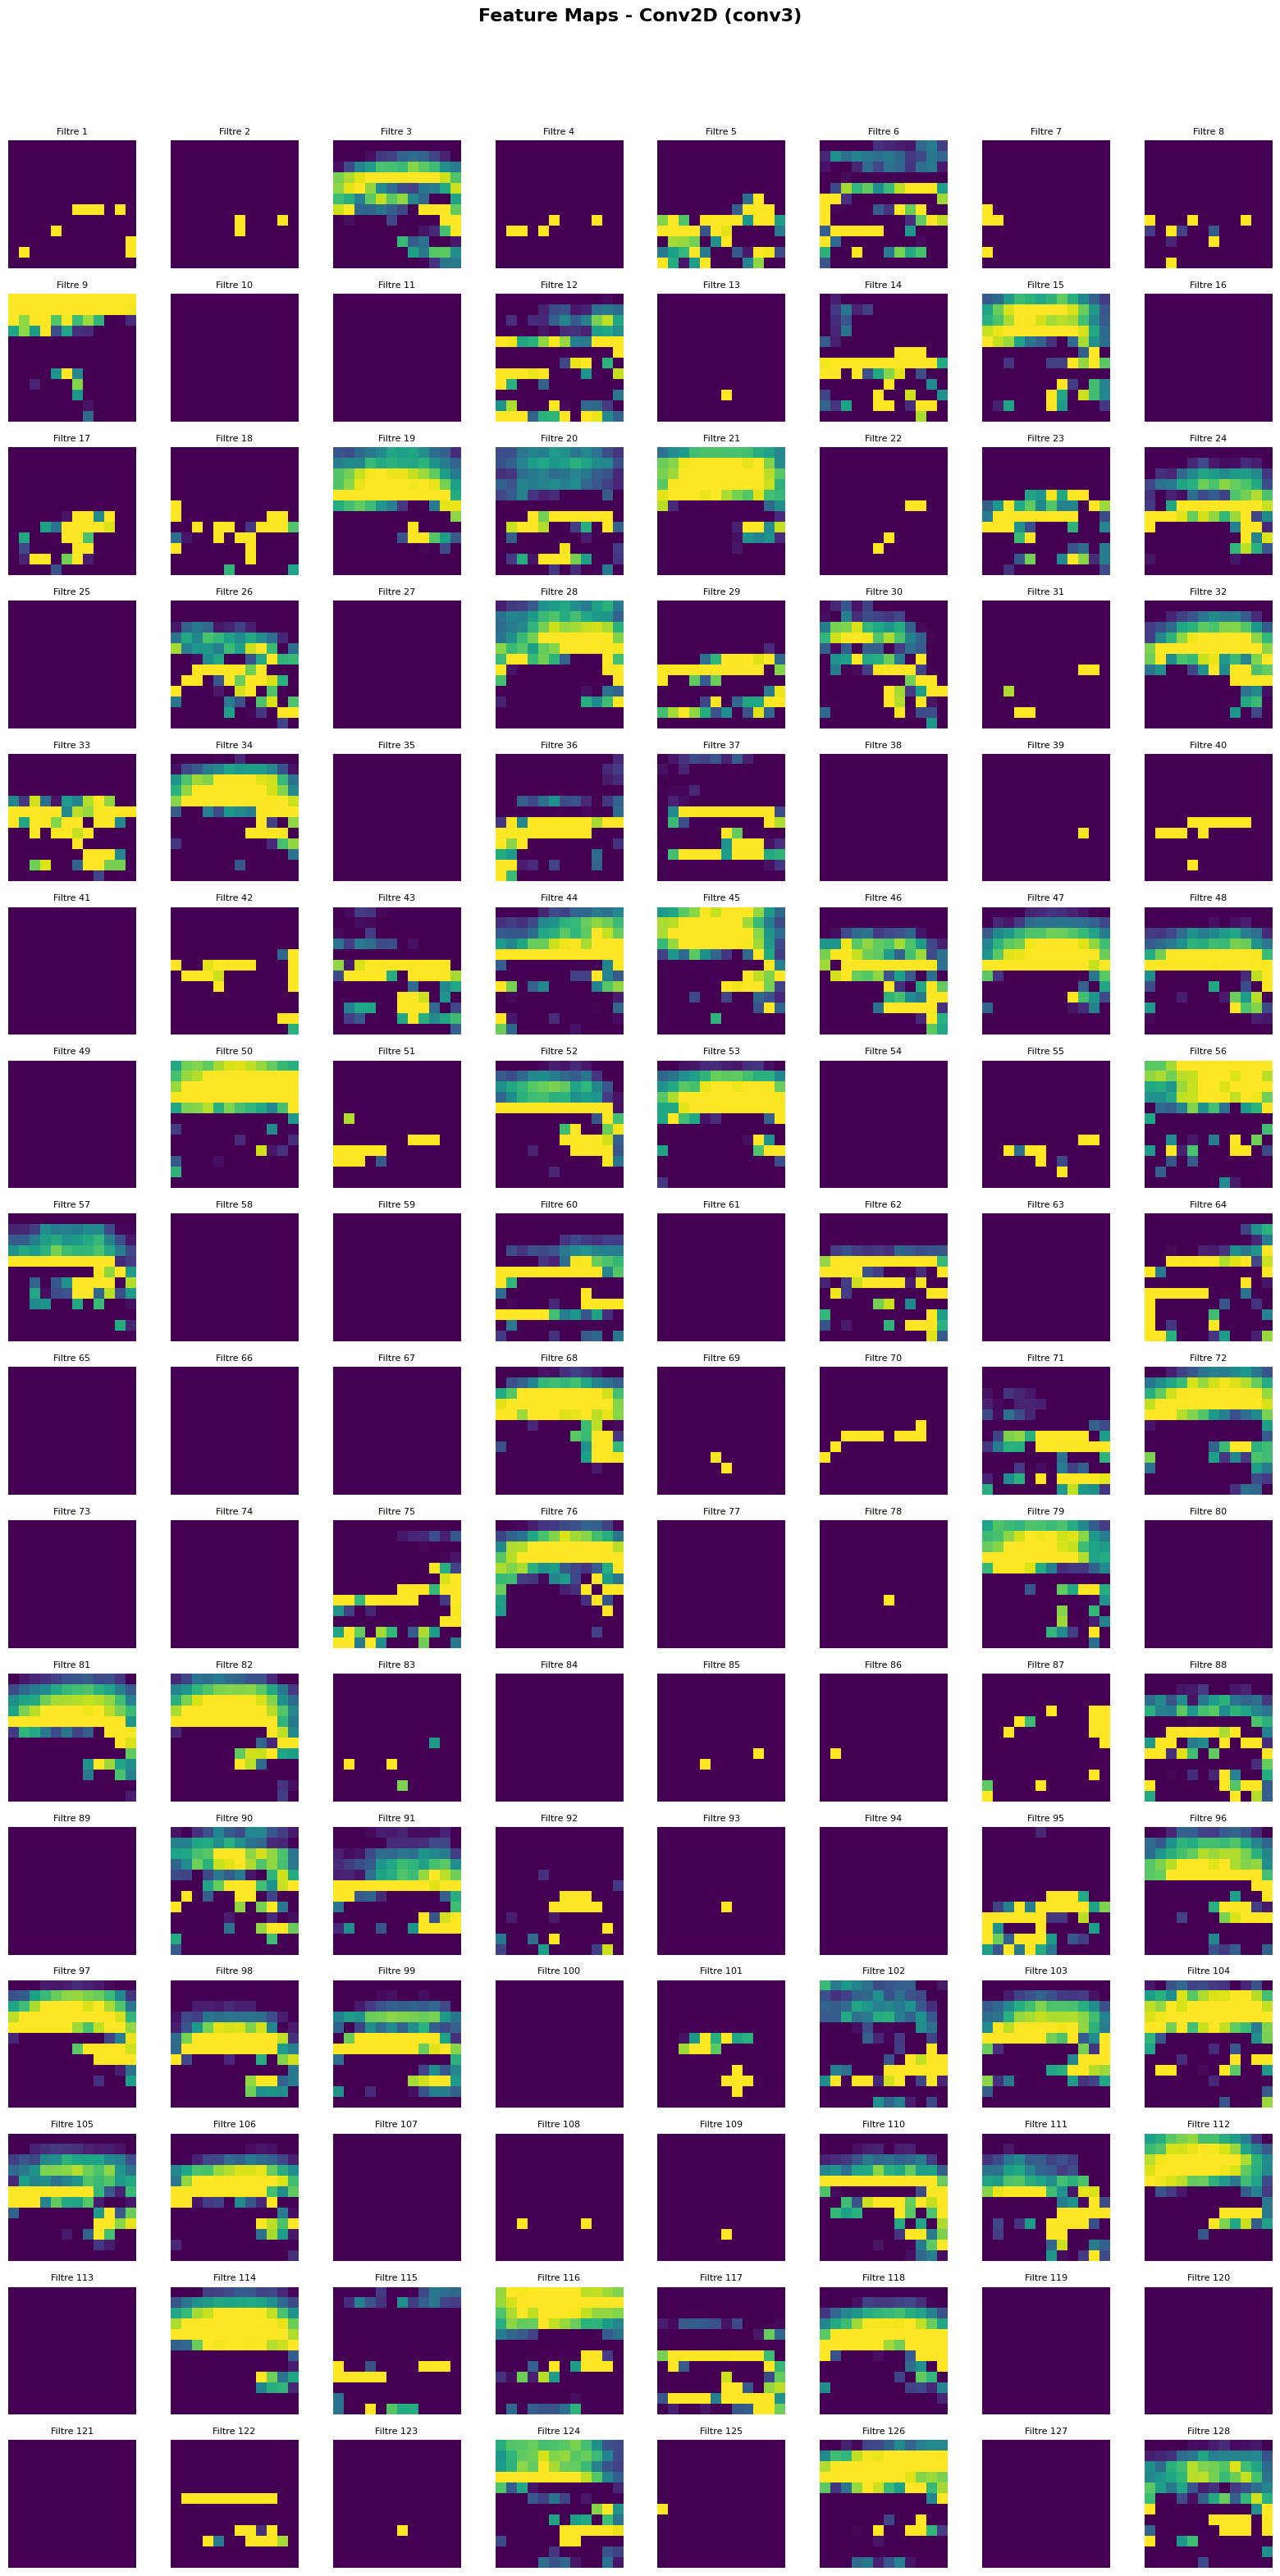

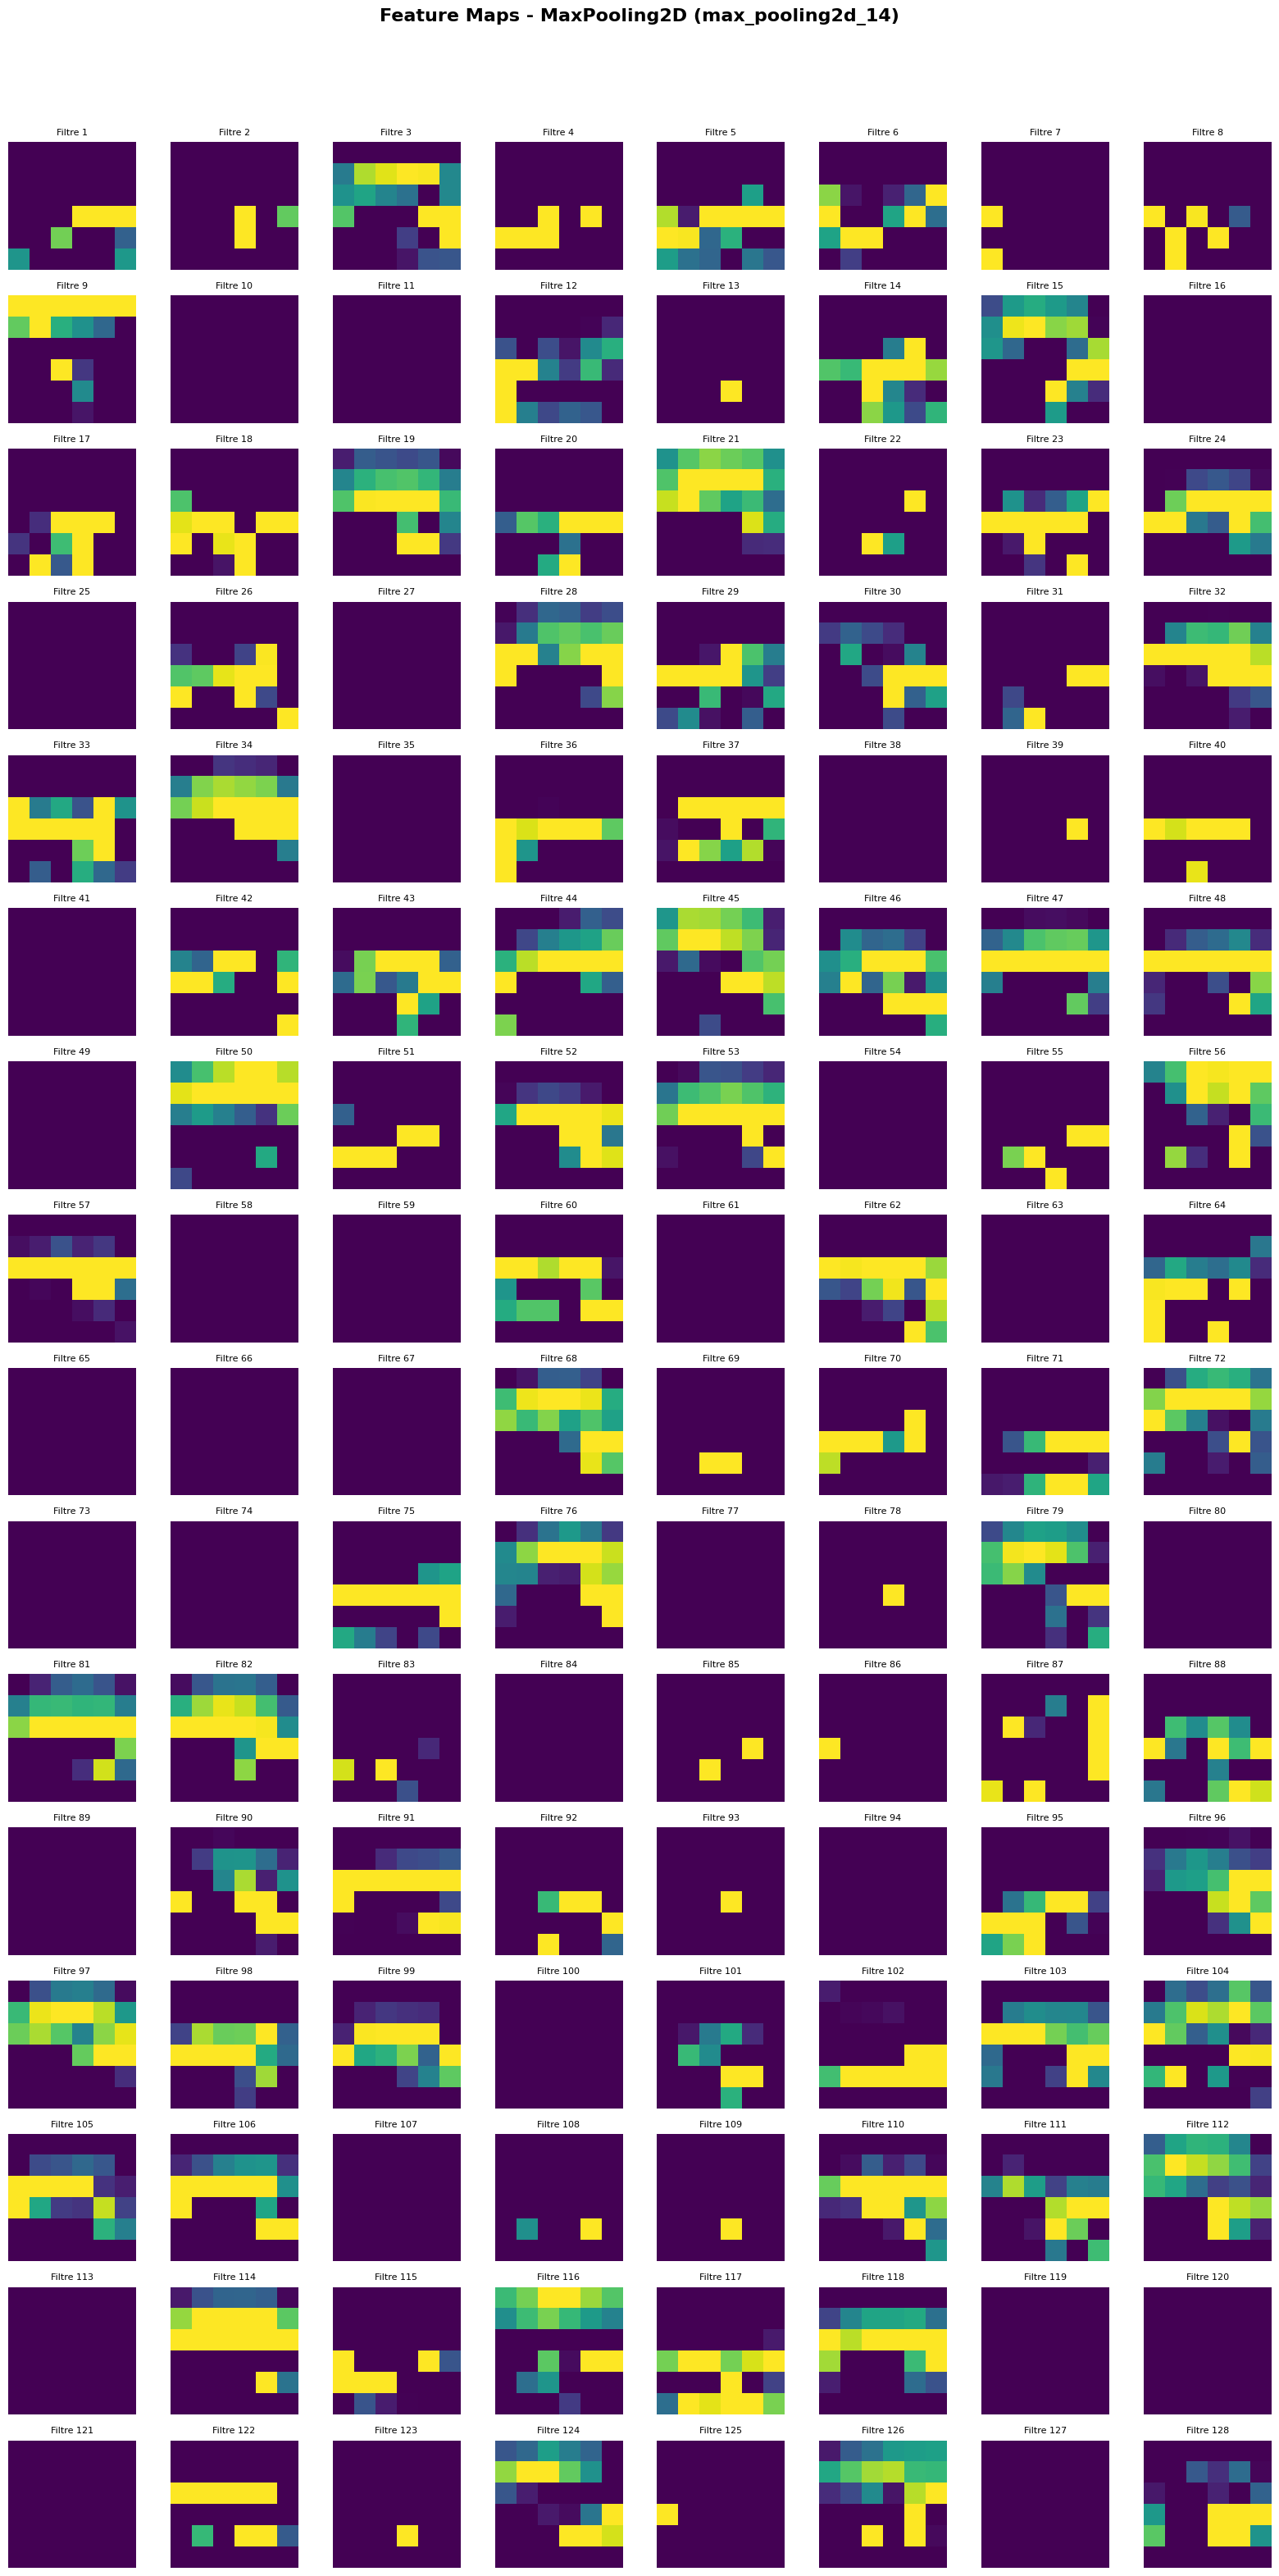

In [ ]:


random_idx = np.random.randint(len(x_test))
sample_image = x_test[random_idx:random_idx+1]

plt.figure(figsize=(4, 4))
plt.imshow(sample_image[0])
plt.title(f'Image test sélectionnée (index {random_idx})')
plt.axis('off')
plt.show()

_ = model.predict(sample_image)

conv_layers = [layer for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
layer_names = [layer.name for layer in conv_layers]
layer_types = [layer.__class__.__name__ for layer in conv_layers]  # ✅ Ajout du type (Conv2D, MaxPooling2D...)

if not conv_layers:
    raise ValueError("Aucune couche de convolution trouvée dans le modèle.")

# Créer le modèle intermédiaire
intermediate_model = Model(inputs=model.input, outputs=[layer.output for layer in conv_layers])

feature_maps = intermediate_model.predict(sample_image)


# Affichage + sauvegarde des feature maps
for layer_name, layer_type, feature_map in zip(layer_names, layer_types, feature_maps):
    n_filters = feature_map.shape[-1]
    size = feature_map.shape[1]

    n_cols = 8
    n_rows = (n_filters + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    axes = axes.flatten()

    for i in range(n_filters):
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x = np.clip(x, 0, 1)

        # Palette colorée
        axes[i].imshow(x, cmap='viridis')
        axes[i].set_title(f'Filtre {i+1}', fontsize=8)
        axes[i].axis('off')

    # Cacher les cases vides
    for i in range(n_filters, len(axes)):
        axes[i].axis('off')

    fig.suptitle(f'Feature Maps - {layer_type} ({layer_name})', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    safe_layer_type = layer_type.replace('/', '_').replace(' ', '_')
    safe_layer_name = layer_name.replace('/', '_').replace(' ', '_')
    save_path = f'images/featuremaps_{safe_layer_type}_{safe_layer_name}_img{random_idx}.png'



    plt.show()


### CNN amélioré

En ajoutant une triosième couche on essaie de mieux extraire les features importants de notre modèle .

In [ ]:
optimizer = 'adam'
activation = 'relu'
batch_size = 32
epochs = 15
model_name = "CNN"
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=activation, input_shape=(IMG_SIZE, IMG_SIZE, 3), name="conv1"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation=activation, name="conv2"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation=activation, name="conv3"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation=activation),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.build(input_shape=(None, IMG_SIZE, IMG_SIZE, 3))

print(model.summary())

start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
)
training_time = time.time() - start_time

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
visualizer(model,history,x_test,y_test,my_classes)

###CNN + KFold

In [ ]:
def create_cnn(learning_rate=0.001, filters1=32, filters2=64, filters3=128):
    model = models.Sequential([
        layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(64, 64, 3), name="conv1"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters2, (3, 3), activation='relu', name="conv2"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters3, (3, 3), activation='relu',name="conv3"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

isKfold = True
model_name = "CNN-KFOLD"

k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

results_cnn = []
learning_rate= 0.001

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    print(f"\nFold {fold+1}/{k}")
    print(f"Train: {len(x_train_fold)}, Validation: {len(x_val_fold)}")

    model = create_cnn(learning_rate=learning_rate, filters1=32, filters2=64, filters3=128)
    start_time = time.time()
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_fold, y_val_fold),
        verbose=0
    )
    training_time = time.time() - start_time

    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'training_time': training_time,
        'train_accuracy': history.history['accuracy'][-1]
    }
    train_acc = history.history['accuracy'][-1]

    results_cnn.append(fold_result)
    print(f"  Train Accuracy (history): {train_acc * 100:.2f}%")
    print(f"Fold {fold+1} - Validation Accuracy: {val_acc * 100:.2f}%, "
          f"Validation Loss: {val_loss:.4f}, Training Time: {training_time:.2f}s")
    visualizer(model,history,x_test,y_test,my_classes)

accuracies = [result['val_accuracy'] for result in results_cnn]
losses = [result['val_loss'] for result in results_cnn]
times = [result['training_time'] for result in results_cnn]
train_accuracy = [result['train_accuracy'] for result in results_cnn]

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
mean_loss = np.mean(losses)
mean_time = np.mean(times)
mean_train_acc = np.mean(train_accuracy)

print(f"\nCNN - Moyenne Accuracy (k-fold): {mean_acc * 100:.2f}%")
print(f"CNN - Écart type Accuracy (k-fold): {std_acc * 100:.2f}%")
print(f"CNN - Moyenne Loss (k-fold): {mean_loss:.4f}")
print(f"CNN - Moyenne Training Time (k-fold): {mean_time:.2f}s")
print(f"CNN - Moyenne train accuracy (k-fold): {mean_train_acc:.2f}s")

In [ ]:
# jeu de test
# model_final = create_cnn()
# model_final.fit(x_kfold, y_kfold, epochs=epochs, batch_size=batch_size, verbose=0)
# test_loss, test_accuracy = model_final.evaluate(x_test, y_test, verbose=0)
# print(f"CNN - Test Accuracy (sur jeu de test séparé): {test_accuracy * 100:.2f}%")

###Modèle optimisation

In [ ]:
model_name ="GridSearchCV"
isKfold = True
IMG_SIZE = 64
k = 4
epochs = 5
batch_size_default = 32

def create_cnn(learning_rate=0.001, filters1=32, filters2=64, filters3=128, dropout_rate=0.5):
    model = models.Sequential([
        layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters2, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters3, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_cnn, epochs=epochs, verbose=1)

param_grid = {
    # 'model__learning_rate': [0.01, 0.001],
    'model__filters1': [16, 32],
    'model__filters2': [32, 64],
    'model__filters3': [64, 128],
    'batch_size': [32, 64],
    'model__dropout_rate': [0.2, 0.5]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=k, n_jobs=-1, verbose=3,scoring='accuracy')
grid_result = grid.fit(x_train, y_train)

print(f"\nMeilleure accuracy (moyenne sur k-fold): {grid_result.best_score_ * 100:.2f}%")
print(f"Meilleurs paramètres: {grid_result.best_params_}")

best_params = grid_result.best_params_
best_learning_rate = best_params['model__learning_rate']
best_filters1 = best_params['model__filters1']
best_filters2 = best_params['model__filters2']
best_filters3 = best_params['model__filters3']
best_batch_size = best_params['batch_size']
best_dropout_rate = best_params['model__dropout_rate']

results_gridsearch = {
    'gridsearch': {
        'best_score': grid_result.best_score_,
        'best_params': grid_result.best_params_,
        'cv_results': {
            'mean_test_score': grid_result.cv_results_['mean_test_score'].tolist(),
            'params': grid_result.cv_results_['params']
        }
    },
    'kfold_results': []
}

kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracies_cnn = []

print("\nValidation croisée avec les meilleurs paramètres :")
for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Créer et entraîner le modèle avec les meilleurs hyperparamètres
    best_model = create_cnn(learning_rate=best_learning_rate, filters1=best_filters1,
                            filters2=best_filters2, filters3=best_filters3,
                            dropout_rate=best_dropout_rate)
    history = best_model.fit(x_train_fold, y_train_fold, epochs=epochs,
                             batch_size=best_batch_size, validation_data=(x_val_fold, y_val_fold),
                             verbose=0)


    val_loss, val_acc = best_model.evaluate(x_val_fold, y_val_fold, verbose=0)

    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'train_accuracy': history.history['accuracy'][-1],
        'train_loss': history.history['loss'][-1],
        'hyperparameters': {
            'learning_rate': best_learning_rate,
            'filters1': best_filters1,
            'filters2': best_filters2,
            'filters3': best_filters3,
            'batch_size': best_batch_size,
            'dropout_rate': best_dropout_rate  # Nouveau
        }
    }
    results_gridsearch['kfold_results'].append(fold_result)
    accuracies_cnn.append(val_acc)
    visualizer(model,history,x_test,y_test,my_classes, isKfold, k)
    print(f"Fold {fold+1}/{k} - Validation Accuracy: {val_acc * 100:.2f}%")

# Résumé
mean_acc = np.mean(accuracies_cnn)
std_acc = np.std(accuracies_cnn)
print(f"\nMoyenne Accuracy (k-fold avec meilleurs paramètres): {mean_acc * 100:.2f}%")
print(f"Écart-type Accuracy: {std_acc * 100:.2f}%")

# Afficher la structure des résultats stockés
print("\nRésultats stockés dans results_gridsearch :")
print(f"GridSearchCV - Meilleure accuracy: {results_gridsearch['gridsearch']['best_score'] * 100:.2f}%")
print(f"GridSearchCV - Meilleurs paramètres: {results_gridsearch['gridsearch']['best_params']}")
print("\nRésultats par fold :")
for fold_result in results_gridsearch['kfold_results']:
    print(f"Fold {fold_result['fold']} - Val Accuracy: {fold_result['val_accuracy']*100:.2f}%, "
          f"Val Loss: {fold_result['val_loss']:.4f}, "
          f"Train Accuracy: {fold_result['train_accuracy']*100:.2f}%")

###Modèle Resnet

In [ ]:


def create_resnet50_model(input_shape=(64, 64, 3), num_classes=1):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='sigmoid')
    ])

    # Compiler
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# K-fold pour évaluer
k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)
results_resnet50 = []
epochs = 5
batch_size = 32
model_name = "Resnet"

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    print(f"\nFold {fold+1}/{k}")
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Créer et entraîner le modèle
    model = create_resnet50_model()
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_fold, y_val_fold),
        verbose=2
    )

    # Évaluer
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Stocker les résultats
    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'train_accuracy': history.history['accuracy'][-1]
    }
    results_resnet50.append(fold_result)
    visualizer(model,history,x_test,y_test,my_classes)
    print(f"Fold {fold+1} - Val Accuracy: {val_acc*100:.2f}%, Val Loss: {val_loss:.4f}, "
          f"Train Accuracy: {history.history['accuracy'][-1]*100:.2f}%")

# Résumé
val_accuracies = [r['val_accuracy'] for r in results_resnet50]
train_accuracies = [r['train_accuracy'] for r in results_resnet50]
print(f"\nResNet50 - Moyenne Val Accuracy: {np.mean(val_accuracies)*100:.2f}% ± {np.std(val_accuracies)*100:.2f}%")
print(f"ResNet50 - Moyenne Train Accuracy: {np.mean(train_accuracies)*100:.2f}% ± {np.std(train_accuracies)*100:.2f}%")


visualizer(model,history,x_test,y_test,my_classes, isKfold,val_accuracies, k)

In [ ]:
visualizer(model,history,x_test,y_test,my_classes, isKfold,val_accuracies, k)

##Fox

###Préparation

In [ ]:

IMG_SIZE=64
COLUMNS = 25
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['fox','Fox_negative_class']
optimizer = 'adam'
activation='relu'
batch_size=32
epochs=15
X, y =create_X_y(my_path,my_classes)
X=X.astype('float')
# X=X/255.0

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


###Modèle baseline

In [ ]:
isKfold = False
optimizer = 'adam'
activation='relu'
batch_size=32
epochs=15
model_name="CNN_baseline"
print(f"Train: {len(x_train)}, Validation: {len(x_val)}, Test: {len(x_test)}")

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=activation, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation=activation),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())
start_time = time.time()

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
)
training_time = time.time() - start_time

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
visualizer(model,history,x_test,y_test,my_classes)

On peut constater un surapprentissage essayons d'améliorer le modèle

###Modèle baseline kfold

In [ ]:
def create_cnn_baseline( filters1=32):
    model = models.Sequential([
        layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(64, 64, 3), name="conv1"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

isKfold = True
model_name = "CNN--BASELINE-KFOLD"

k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

results_cnn = []
learning_rate= 0.001

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    print(f"\nFold {fold+1}/{k}")
    print(f"Train: {len(x_train_fold)}, Validation: {len(x_val_fold)}")

    model = create_cnn_baseline( filters1=32)
    start_time = time.time()
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_fold, y_val_fold),
        verbose=0
    )
    training_time = time.time() - start_time

    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'training_time': training_time,
        'train_accuracy': history.history['accuracy'][-1]
    }
    train_acc = history.history['accuracy'][-1]

    results_cnn.append(fold_result)
    print(f"  Train Accuracy (history): {train_acc * 100:.2f}%")
    print(f"Fold {fold+1} - Validation Accuracy: {val_acc * 100:.2f}%, "
          f"Validation Loss: {val_loss:.4f}, Training Time: {training_time:.2f}s")
    visualizer(model,history,x_test,y_test,my_classes)

accuracies = [result['val_accuracy'] for result in results_cnn]
losses = [result['val_loss'] for result in results_cnn]
times = [result['training_time'] for result in results_cnn]
train_accuracy = [result['train_accuracy'] for result in results_cnn]

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
mean_loss = np.mean(losses)
mean_time = np.mean(times)
mean_train_acc = np.mean(train_accuracy)

print(f"\nCNN - Moyenne Accuracy (k-fold): {mean_acc * 100:.2f}%")
print(f"CNN - Écart type Accuracy (k-fold): {std_acc * 100:.2f}%")
print(f"CNN - Moyenne Loss (k-fold): {mean_loss:.4f}")
print(f"CNN - Moyenne Training Time (k-fold): {mean_time:.2f}s")
print(f"CNN - Moyenne train accuracy (k-fold): {mean_train_acc:.2f}s")

### CNN amélioré

En ajoutant une triosième couche on essaie de mieux extraire les features importants de notre modèle .

In [ ]:
isKfold = False

#Pré-requis
optimizer = 'adam'
activation='relu'
batch_size=32
epochs=15
model_name="CNN"
print(f"Train: {len(x_train)}, Validation: {len(x_val)}, Test: {len(x_test)}")

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=activation, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=activation),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation=activation),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation=activation),
    # layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())
start_time = time.time()

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
)
training_time = time.time() - start_time

#évaluer performances
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
visualizer(model,history,x_test,y_test,my_classes)

###CNN + KFold

In [ ]:
isKfold = True
model_name = "CNN-KFOLD"

k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

results_cnn = []


for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    print(f"\nFold {fold+1}/{k}")
    print(f"Train: {len(x_train_fold)}, Validation: {len(x_val_fold)}")

    model = create_cnn()
    start_time = time.time()
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_fold, y_val_fold),
        verbose=0
    )
    training_time = time.time() - start_time

    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'training_time': training_time,
        'train_accuracy': history.history['accuracy'][-1]
    }
    train_acc = history.history['accuracy'][-1]

    results_cnn.append(fold_result)
    print(f"  Train Accuracy (history): {train_acc * 100:.2f}%")
    print(f"Fold {fold+1} - Validation Accuracy: {val_acc * 100:.2f}%, "
          f"Validation Loss: {val_loss:.4f}, Training Time: {training_time:.2f}s")
    visualizer(model,history,x_test,y_test,my_classes)

accuracies = [result['val_accuracy'] for result in results_cnn]
losses = [result['val_loss'] for result in results_cnn]
times = [result['training_time'] for result in results_cnn]
train_accuracy = [result['train_accuracy'] for result in results_cnn]

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
mean_loss = np.mean(losses)
mean_time = np.mean(times)
mean_train_acc = np.mean(train_accuracy)

print(f"\nCNN - Moyenne Accuracy (k-fold): {mean_acc * 100:.2f}%")
print(f"CNN - Écart type Accuracy (k-fold): {std_acc * 100:.2f}%")
print(f"CNN - Moyenne Loss (k-fold): {mean_loss:.4f}")
print(f"CNN - Moyenne Training Time (k-fold): {mean_time:.2f}s")
print(f"CNN - Moyenne train accuracy (k-fold): {mean_train_acc:.2f}s")



In [ ]:
def plot_kfold_results(results_cnn, k):
    folds = [r['fold'] for r in results_cnn]
    val_accuracies = [r['val_accuracy'] for r in results_cnn]
    train_accuracies = [r['train_accuracy'] for r in results_cnn]
    val_losses = [r['val_loss'] for r in results_cnn]
    training_times = [r['training_time'] for r in results_cnn]

    mean_val_acc = np.mean(val_accuracies)
    std_val_acc = np.std(val_accuracies)
    mean_train_acc = np.mean(train_accuracies)
    std_train_acc = np.std(train_accuracies)
    mean_loss = np.mean(val_losses)
    std_loss = np.std(val_losses)
    mean_time = np.mean(training_times)
    std_time = np.std(training_times)
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.boxplot(data=[train_accuracies, val_accuracies], palette=['skyblue', 'lightcoral'])
    sns.stripplot(data=[train_accuracies, val_accuracies], color='black', size=8, jitter=False)
    plt.xticks([0, 1], ['Train Accuracy', 'Val Accuracy'])
    plt.title('Distribution des Accuracies par Fold')
    plt.ylabel('Accuracy')
    plt.grid(True, linestyle='--', alpha=0.5)

    max_val_acc = max(val_accuracies)
    max_fold = folds[val_accuracies.index(max_val_acc)]
    plt.text(1, max_val_acc, f'Max Val: {max_val_acc*100:.2f}% (Fold {max_fold})',
             ha='center', va='bottom', color='darkred')
    plt.subplot(2, 2, 2)
    plt.plot(folds, val_losses, marker='o', label='Val Loss', color='purple')
    plt.axhline(mean_loss, color='purple', linestyle='--', alpha=0.5,
                label=f'Moyenne: {mean_loss:.4f}')
    plt.fill_between(folds, mean_loss - std_loss, mean_loss + std_loss,
                     color='purple', alpha=0.1, label=f'±{std_loss:.4f}')
    plt.title('Validation Loss par Fold')
    plt.xlabel('Fold')
    plt.ylabel('Loss')
    plt.xticks(folds)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.subplot(2, 2, 3)
    plt.plot(folds, training_times, marker='s', label='Training Time', color='green')
    plt.axhline(mean_time, color='green', linestyle='--', alpha=0.5,
                label=f'Moyenne: {mean_time:.2f}s')
    plt.fill_between(folds, mean_time - std_time, mean_time + std_time,
                     color='green', alpha=0.1, label=f'±{std_time:.2f}s')
    plt.title('Temps d’Entraînement par Fold')
    plt.xlabel('Fold')
    plt.ylabel('Temps (s)')
    plt.xticks(folds)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.subplot(2, 2, 4)
    plt.plot(folds, train_accuracies, marker='o', label='Train Accuracy', color='skyblue')
    plt.plot(folds, val_accuracies, marker='o', label='Val Accuracy', color='lightcoral')
    plt.axhline(mean_train_acc, color='skyblue', linestyle='--', alpha=0.5,
                label=f'Moyenne Train: {mean_train_acc*100:.2f}%')
    plt.axhline(mean_val_acc, color='lightcoral', linestyle='--', alpha=0.5,
                label=f'Moyenne Val: {mean_val_acc*100:.2f}%')
    plt.title('Train vs Val Accuracy par Fold')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.xticks(folds)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    print(f"Résumé des performances (k={k}):")
    print(f"  Moyenne Train Accuracy: {mean_train_acc*100:.2f}% ± {std_train_acc*100:.2f}%")
    print(f"  Moyenne Val Accuracy: {mean_val_acc*100:.2f}% ± {std_val_acc*100:.2f}%")
    print(f"  Moyenne Val Loss: {mean_loss:.4f} ± {std_loss:.4f}")
    print(f"  Moyenne Training Time: {mean_time:.2f}s ± {std_time:.2f}s")

plot_kfold_results(results_cnn,k)

In [ ]:
# jeu de test
# model_final = create_cnn()
# model_final.fit(x_kfold, y_kfold, epochs=epochs, batch_size=batch_size, verbose=0)
# test_loss, test_accuracy = model_final.evaluate(x_test, y_test, verbose=0)
# print(f"CNN - Test Accuracy (sur jeu de test séparé): {test_accuracy * 100:.2f}%")

###Modèle optimisation

In [ ]:
model_name ="GridSearchCV"
isKfold = True
IMG_SIZE = 64
k = 4
epochs = 5
batch_size_default = 32

def create_cnn(learning_rate=0.001, filters1=32, filters2=64, filters3=128, dropout_rate=0.5):
    model = models.Sequential([
        layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters2, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters3, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_cnn, epochs=epochs, verbose=1)

param_grid = {
    'model__learning_rate': [0.01, 0.001],
    'model__filters1': [16, 32],
    'model__filters2': [32, 64],
    'model__filters3': [64, 128],
    'batch_size': [32, 64],
    'model__dropout_rate': [0.2, 0.5]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=k, n_jobs=-1, verbose=3,scoring='accuracy')
grid_result = grid.fit(x_train, y_train)

print(f"\nMeilleure accuracy (moyenne sur k-fold): {grid_result.best_score_ * 100:.2f}%")
print(f"Meilleurs paramètres: {grid_result.best_params_}")

best_params = grid_result.best_params_
best_learning_rate = best_params['model__learning_rate']
best_filters1 = best_params['model__filters1']
best_filters2 = best_params['model__filters2']
best_filters3 = best_params['model__filters3']
best_batch_size = best_params['batch_size']
best_dropout_rate = best_params['model__dropout_rate']

results_gridsearch = {
    'gridsearch': {
        'best_score': grid_result.best_score_,
        'best_params': grid_result.best_params_,
        'cv_results': {
            'mean_test_score': grid_result.cv_results_['mean_test_score'].tolist(),
            'params': grid_result.cv_results_['params']
        }
    },
    'kfold_results': []
}

kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracies_cnn = []

print("\nValidation croisée avec les meilleurs paramètres :")
for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    best_model = create_cnn(learning_rate=best_learning_rate, filters1=best_filters1,
                            filters2=best_filters2, filters3=best_filters3,
                            dropout_rate=best_dropout_rate)
    history = best_model.fit(x_train_fold, y_train_fold, epochs=epochs,
                             batch_size=best_batch_size, validation_data=(x_val_fold, y_val_fold),
                             verbose=0)


    val_loss, val_acc = best_model.evaluate(x_val_fold, y_val_fold, verbose=0)

    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'train_accuracy': history.history['accuracy'][-1],
        'train_loss': history.history['loss'][-1],
        'hyperparameters': {
            'learning_rate': best_learning_rate,
            'filters1': best_filters1,
            'filters2': best_filters2,
            'filters3': best_filters3,
            'batch_size': best_batch_size,
            'dropout_rate': best_dropout_rate
        }
    }
    results_gridsearch['kfold_results'].append(fold_result)
    accuracies_cnn.append(val_acc)
    visualizer(model,history,x_test,y_test,my_classes, isKfold, k)
    print(f"Fold {fold+1}/{k} - Validation Accuracy: {val_acc * 100:.2f}%")

mean_acc = np.mean(accuracies_cnn)
std_acc = np.std(accuracies_cnn)
print(f"\nMoyenne Accuracy (k-fold avec meilleurs paramètres): {mean_acc * 100:.2f}%")
print(f"Écart-type Accuracy: {std_acc * 100:.2f}%")

print("\nRésultats stockés dans results_gridsearch :")
print(f"GridSearchCV - Meilleure accuracy: {results_gridsearch['gridsearch']['best_score'] * 100:.2f}%")
print(f"GridSearchCV - Meilleurs paramètres: {results_gridsearch['gridsearch']['best_params']}")
print("\nRésultats par fold :")
for fold_result in results_gridsearch['kfold_results']:
    print(f"Fold {fold_result['fold']} - Val Accuracy: {fold_result['val_accuracy']*100:.2f}%, "
          f"Val Loss: {fold_result['val_loss']:.4f}, "
          f"Train Accuracy: {fold_result['train_accuracy']*100:.2f}%")

###Modèle Resnet

In [ ]:


def create_resnet50_model(input_shape=(64, 64, 3), num_classes=1):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='sigmoid')
    ])

    # Compiler
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# K-fold pour évaluer
k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)
results_resnet50 = []
epochs = 5
batch_size = 32

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    print(f"\nFold {fold+1}/{k}")
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_resnet50_model()
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_fold, y_val_fold),
        verbose=2
    )

    # Évaluer
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Stocker les résultats
    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'train_accuracy': history.history['accuracy'][-1]
    }
    results_resnet50.append(fold_result)

    print(f"Fold {fold+1} - Val Accuracy: {val_acc*100:.2f}%, Val Loss: {val_loss:.4f}, "
          f"Train Accuracy: {history.history['accuracy'][-1]*100:.2f}%")

# Résumé
val_accuracies = [r['val_accuracy'] for r in results_resnet50]
train_accuracies = [r['train_accuracy'] for r in results_resnet50]
print(f"\nResNet50 - Moyenne Val Accuracy: {np.mean(val_accuracies)*100:.2f}% ± {np.std(val_accuracies)*100:.2f}%")
print(f"ResNet50 - Moyenne Train Accuracy: {np.mean(train_accuracies)*100:.2f}% ± {np.std(train_accuracies)*100:.2f}%")


visualizer(model,history,x_test,y_test,my_classes, isKfold, k)

In [ ]:
visualizer(model,history,x_test,y_test,my_classes, isKfold, k)

##Elephant

###Préparation

In [ ]:

IMG_SIZE=64
COLUMNS = 25
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['elephant','Elephant_negative_class']

optimizer = 'adam'
activation='relu'
batch_size=32
epochs=15

X, y =create_X_y(my_path,my_classes)
X=X.astype('float')
# X=X/255.0
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


###Modèle baseline

In [ ]:
isKfold = False
optimizer = 'adam'
activation='relu'
batch_size=32
epochs=15
model_name="CNN_baseline"
print(f"Train: {len(x_train)}, Validation: {len(x_val)}, Test: {len(x_test)}")

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=activation, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation=activation),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())
start_time = time.time()

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
)
training_time = time.time() - start_time

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
visualizer(model,history,x_test,y_test,my_classes)

On peut constater un surapprentissage essayons d'améliorer le modèle

###Modèle baseline kfold

In [ ]:
def create_cnn_baseline( filters1=32):
    model = models.Sequential([
        layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(64, 64, 3), name="conv1"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

isKfold = True
model_name = "CNN--BASELINE-KFOLD"

k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

results_cnn = []
learning_rate= 0.001

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    print(f"\nFold {fold+1}/{k}")
    print(f"Train: {len(x_train_fold)}, Validation: {len(x_val_fold)}")

    model = create_cnn_baseline( filters1=32)
    start_time = time.time()
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_fold, y_val_fold),
        verbose=0
    )
    training_time = time.time() - start_time

    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'training_time': training_time,
        'train_accuracy': history.history['accuracy'][-1]
    }
    train_acc = history.history['accuracy'][-1]

    results_cnn.append(fold_result)
    print(f"  Train Accuracy (history): {train_acc * 100:.2f}%")
    print(f"Fold {fold+1} - Validation Accuracy: {val_acc * 100:.2f}%, "
          f"Validation Loss: {val_loss:.4f}, Training Time: {training_time:.2f}s")
    visualizer(model,history,x_test,y_test,my_classes)

accuracies = [result['val_accuracy'] for result in results_cnn]
losses = [result['val_loss'] for result in results_cnn]
times = [result['training_time'] for result in results_cnn]
train_accuracy = [result['train_accuracy'] for result in results_cnn]

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
mean_loss = np.mean(losses)
mean_time = np.mean(times)
mean_train_acc = np.mean(train_accuracy)

print(f"\nCNN - Moyenne Accuracy (k-fold): {mean_acc * 100:.2f}%")
print(f"CNN - Écart type Accuracy (k-fold): {std_acc * 100:.2f}%")
print(f"CNN - Moyenne Loss (k-fold): {mean_loss:.4f}")
print(f"CNN - Moyenne Training Time (k-fold): {mean_time:.2f}s")
print(f"CNN - Moyenne train accuracy (k-fold): {mean_train_acc:.2f}s")

### CNN amélioré

En ajoutant une triosième couche on essaie de mieux extraire les features importants de notre modèle .

In [ ]:
isKfold = False
optimizer = 'adam'
activation='relu'
batch_size=32
epochs=15
model_name="CNN"
print(f"Train: {len(x_train)}, Validation: {len(x_val)}, Test: {len(x_test)}")

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=activation, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=activation),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation=activation),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation=activation),
    # layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())
start_time = time.time()

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
)
training_time = time.time() - start_time

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
visualizer(model,history,x_test,y_test,my_classes)

###CNN + KFold

In [ ]:
isKfold = True
model_name = "CNN-KFOLD"

k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

results_cnn = []


for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    print(f"\nFold {fold+1}/{k}")
    print(f"Train: {len(x_train_fold)}, Validation: {len(x_val_fold)}")

    model = create_cnn()
    start_time = time.time()
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_fold, y_val_fold),
        verbose=0
    )
    training_time = time.time() - start_time

    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'training_time': training_time,
        'train_accuracy': history.history['accuracy'][-1]
    }
    train_acc = history.history['accuracy'][-1]

    results_cnn.append(fold_result)
    print(f"  Train Accuracy (history): {train_acc * 100:.2f}%")
    print(f"Fold {fold+1} - Validation Accuracy: {val_acc * 100:.2f}%, "
          f"Validation Loss: {val_loss:.4f}, Training Time: {training_time:.2f}s")
    visualizer(model,history,x_test,y_test,my_classes)

accuracies = [result['val_accuracy'] for result in results_cnn]
losses = [result['val_loss'] for result in results_cnn]
times = [result['training_time'] for result in results_cnn]
train_accuracy = [result['train_accuracy'] for result in results_cnn]

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
mean_loss = np.mean(losses)
mean_time = np.mean(times)
mean_train_acc = np.mean(train_accuracy)

print(f"\nCNN - Moyenne Accuracy (k-fold): {mean_acc * 100:.2f}%")
print(f"CNN - Écart type Accuracy (k-fold): {std_acc * 100:.2f}%")
print(f"CNN - Moyenne Loss (k-fold): {mean_loss:.4f}")
print(f"CNN - Moyenne Training Time (k-fold): {mean_time:.2f}s")
print(f"CNN - Moyenne train accuracy (k-fold): {mean_train_acc:.2f}s")



In [ ]:
def plot_kfold_results(results_cnn, k):
    folds = [r['fold'] for r in results_cnn]
    val_accuracies = [r['val_accuracy'] for r in results_cnn]
    train_accuracies = [r['train_accuracy'] for r in results_cnn]
    val_losses = [r['val_loss'] for r in results_cnn]
    training_times = [r['training_time'] for r in results_cnn]

    mean_val_acc = np.mean(val_accuracies)
    std_val_acc = np.std(val_accuracies)
    mean_train_acc = np.mean(train_accuracies)
    std_train_acc = np.std(train_accuracies)
    mean_loss = np.mean(val_losses)
    std_loss = np.std(val_losses)
    mean_time = np.mean(training_times)
    std_time = np.std(training_times)

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(data=[train_accuracies, val_accuracies], palette=['skyblue', 'lightcoral'])
    sns.stripplot(data=[train_accuracies, val_accuracies], color='black', size=8, jitter=False)
    plt.xticks([0, 1], ['Train Accuracy', 'Val Accuracy'])
    plt.title('Distribution des Accuracies par Fold')
    plt.ylabel('Accuracy')
    plt.grid(True, linestyle='--', alpha=0.5)
    max_val_acc = max(val_accuracies)
    max_fold = folds[val_accuracies.index(max_val_acc)]
    plt.text(1, max_val_acc, f'Max Val: {max_val_acc*100:.2f}% (Fold {max_fold})',
             ha='center', va='bottom', color='darkred')

    plt.subplot(2, 2, 2)
    plt.plot(folds, val_losses, marker='o', label='Val Loss', color='purple')
    plt.axhline(mean_loss, color='purple', linestyle='--', alpha=0.5,
                label=f'Moyenne: {mean_loss:.4f}')
    plt.fill_between(folds, mean_loss - std_loss, mean_loss + std_loss,
                     color='purple', alpha=0.1, label=f'±{std_loss:.4f}')
    plt.title('Validation Loss par Fold')
    plt.xlabel('Fold')
    plt.ylabel('Loss')
    plt.xticks(folds)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.subplot(2, 2, 3)
    plt.plot(folds, training_times, marker='s', label='Training Time', color='green')
    plt.axhline(mean_time, color='green', linestyle='--', alpha=0.5,
                label=f'Moyenne: {mean_time:.2f}s')
    plt.fill_between(folds, mean_time - std_time, mean_time + std_time,
                     color='green', alpha=0.1, label=f'±{std_time:.2f}s')
    plt.title('Temps d’Entraînement par Fold')
    plt.xlabel('Fold')
    plt.ylabel('Temps (s)')
    plt.xticks(folds)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.subplot(2, 2, 4)
    plt.plot(folds, train_accuracies, marker='o', label='Train Accuracy', color='skyblue')
    plt.plot(folds, val_accuracies, marker='o', label='Val Accuracy', color='lightcoral')
    plt.axhline(mean_train_acc, color='skyblue', linestyle='--', alpha=0.5,
                label=f'Moyenne Train: {mean_train_acc*100:.2f}%')
    plt.axhline(mean_val_acc, color='lightcoral', linestyle='--', alpha=0.5,
                label=f'Moyenne Val: {mean_val_acc*100:.2f}%')
    plt.title('Train vs Val Accuracy par Fold')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.xticks(folds)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    print(f"Résumé des performances (k={k}):")
    print(f"  Moyenne Train Accuracy: {mean_train_acc*100:.2f}% ± {std_train_acc*100:.2f}%")
    print(f"  Moyenne Val Accuracy: {mean_val_acc*100:.2f}% ± {std_val_acc*100:.2f}%")
    print(f"  Moyenne Val Loss: {mean_loss:.4f} ± {std_loss:.4f}")
    print(f"  Moyenne Training Time: {mean_time:.2f}s ± {std_time:.2f}s")

plot_kfold_results(results_cnn,k)

In [ ]:
# jeu de test
# model_final = create_cnn()
# model_final.fit(x_kfold, y_kfold, epochs=epochs, batch_size=batch_size, verbose=0)
# test_loss, test_accuracy = model_final.evaluate(x_test, y_test, verbose=0)
# print(f"CNN - Test Accuracy (sur jeu de test séparé): {test_accuracy * 100:.2f}%")

###Modèle optimisation

In [ ]:
model_name ="GridSearchCV"
isKfold = True
IMG_SIZE = 64
k = 4
epochs = 5
batch_size_default = 32

def create_cnn(learning_rate=0.001, filters1=32, filters2=64, filters3=128, dropout_rate=0.5):
    model = models.Sequential([
        layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters2, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters3, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),  # Ajout de la couche Dropout
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_cnn, epochs=epochs, verbose=1)

param_grid = {
    'model__learning_rate': [0.01, 0.001],
    'model__filters1': [16, 32],
    'model__filters2': [32, 64],
    'model__filters3': [64, 128],
    'batch_size': [32, 64],
    'model__dropout_rate': [0.2, 0.5]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=k, n_jobs=-1, verbose=3,scoring='accuracy')
grid_result = grid.fit(x_train, y_train)

print(f"\nMeilleure accuracy (moyenne sur k-fold): {grid_result.best_score_ * 100:.2f}%")
print(f"Meilleurs paramètres: {grid_result.best_params_}")

best_params = grid_result.best_params_
best_learning_rate = best_params['model__learning_rate']
best_filters1 = best_params['model__filters1']
best_filters2 = best_params['model__filters2']
best_filters3 = best_params['model__filters3']
best_batch_size = best_params['batch_size']
best_dropout_rate = best_params['model__dropout_rate']

results_gridsearch = {
    'gridsearch': {
        'best_score': grid_result.best_score_,
        'best_params': grid_result.best_params_,
        'cv_results': {
            'mean_test_score': grid_result.cv_results_['mean_test_score'].tolist(),
            'params': grid_result.cv_results_['params']
        }
    },
    'kfold_results': []
}

kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracies_cnn = []

print("\nValidation croisée avec les meilleurs paramètres :")
for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    best_model = create_cnn(learning_rate=best_learning_rate, filters1=best_filters1,
                            filters2=best_filters2, filters3=best_filters3,
                            dropout_rate=best_dropout_rate)
    history = best_model.fit(x_train_fold, y_train_fold, epochs=epochs,
                             batch_size=best_batch_size, validation_data=(x_val_fold, y_val_fold),
                             verbose=0)


    val_loss, val_acc = best_model.evaluate(x_val_fold, y_val_fold, verbose=0)

    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'train_accuracy': history.history['accuracy'][-1],
        'train_loss': history.history['loss'][-1],
        'hyperparameters': {
            'learning_rate': best_learning_rate,
            'filters1': best_filters1,
            'filters2': best_filters2,
            'filters3': best_filters3,
            'batch_size': best_batch_size,
            'dropout_rate': best_dropout_rate  # Nouveau
        }
    }
    results_gridsearch['kfold_results'].append(fold_result)
    accuracies_cnn.append(val_acc)
    visualizer(model,history,x_test,y_test,my_classes, isKfold, k)
    print(f"Fold {fold+1}/{k} - Validation Accuracy: {val_acc * 100:.2f}%")

# Résumé
mean_acc = np.mean(accuracies_cnn)
std_acc = np.std(accuracies_cnn)
print(f"\nMoyenne Accuracy (k-fold avec meilleurs paramètres): {mean_acc * 100:.2f}%")
print(f"Écart-type Accuracy: {std_acc * 100:.2f}%")

print("\nRésultats stockés dans results_gridsearch :")
print(f"GridSearchCV - Meilleure accuracy: {results_gridsearch['gridsearch']['best_score'] * 100:.2f}%")
print(f"GridSearchCV - Meilleurs paramètres: {results_gridsearch['gridsearch']['best_params']}")
print("\nRésultats par fold :")
for fold_result in results_gridsearch['kfold_results']:
    print(f"Fold {fold_result['fold']} - Val Accuracy: {fold_result['val_accuracy']*100:.2f}%, "
          f"Val Loss: {fold_result['val_loss']:.4f}, "
          f"Train Accuracy: {fold_result['train_accuracy']*100:.2f}%")

###Modèle Resnet

In [ ]:


def create_resnet50_model(input_shape=(64, 64, 3), num_classes=1):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='sigmoid')
    ])

    # Compiler
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# K-fold pour évaluer
k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)
results_resnet50 = []
epochs = 5
batch_size = 32

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    print(f"\nFold {fold+1}/{k}")
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_resnet50_model()
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_fold, y_val_fold),
        verbose=2
    )

    # Évaluer
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Stocker les résultats
    fold_result = {
        'fold': fold + 1,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'train_accuracy': history.history['accuracy'][-1]
    }
    results_resnet50.append(fold_result)

    print(f"Fold {fold+1} - Val Accuracy: {val_acc*100:.2f}%, Val Loss: {val_loss:.4f}, "
          f"Train Accuracy: {history.history['accuracy'][-1]*100:.2f}%")

# Résumé
val_accuracies = [r['val_accuracy'] for r in results_resnet50]
train_accuracies = [r['train_accuracy'] for r in results_resnet50]
print(f"\nResNet50 - Moyenne Val Accuracy: {np.mean(val_accuracies)*100:.2f}% ± {np.std(val_accuracies)*100:.2f}%")
print(f"ResNet50 - Moyenne Train Accuracy: {np.mean(train_accuracies)*100:.2f}% ± {np.std(train_accuracies)*100:.2f}%")


visualizer(model,history,x_test,y_test,my_classes, isKfold, k)

In [ ]:
visualizer(model,history,x_test,y_test,my_classes, isKfold, k)

## Data augmentation


In [ ]:
#cell génerique pour augmenter les données
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    # fill_mode='nearest'
)
old_x_train = x_train
old_y_train = y_train
datagen.fit(x_train)
plot_augmented_images(x_train, datagen)

x_train, y_train = augment_dataset(old_x_train, old_y_train, datagen, augmentation_factor=10)

print(f"Taille dataset original : {old_x_train.shape}")
print(f"Taille dataset augmenté : {x_train.shape}")


## Sauvegarder les modèles et Enregistrer les résultats

In [ ]:
from datetime import datetime

if(isKfold == True):
  moyenne_accuracy =  mean_acc * 100
  ecart_type_accuracy = std_acc * 100
  final_loss = None
  final_accuracy = None
  final_val_loss = None
  final_val_accuracy = None
else:
  final_loss = history.history['loss'][-1] or None
  final_accuracy = history.history['accuracy'][-1] or None
  final_val_loss = history.history['val_loss'][-1] or None
  final_val_accuracy = history.history['val_accuracy'][-1] or None
  moyenne_accuracy = None
  ecart_type_accuracy = None
  test_accuracy = None
  learning_rate = None
  k = None



training_id = datetime.now()

SCOPES = ['https://www.googleapis.com/auth/drive.file']

saved_model_filename = f"{model_name}_{training_id}.keras"
path_to_model_file ='/content/gdrive/My Drive/Colab Notebooks/models/' + saved_model_filename
print(path_to_model_file)

model.save(path_to_model_file)
print(f'Modèle sauvegardé dans {path_to_model_file}')


file_id = '1sEaqLjJN7lZCKJ2fYbOmiqJIytB8wIpKChZkK32kzCI'
train_results = {
    'Training ID': training_id,
    'Model Name': model_name,
    'ClassName': my_classes[0],
    'Coach' : 'Reza',
    'Epoch': epochs,
    'Loss': final_loss,
    'Accuracy': final_accuracy,
    'Validation Loss': final_val_loss,
    'Validation Accuracy': final_val_accuracy,
    'Moyenne Accuracy': moyenne_accuracy,
    'Ecart type Accuracy': ecart_type_accuracy,
    # 'Test Accuracy': test_accuracy ? test_accuracy : None,
    'Training Time (s)': 490,
    'Batch size': batch_size,
    'k': k,
    'Learning Rate': None,
    'Optimizer': optimizer,
    'Model Type': 'Sequential',
    'Dataset Type': 'Custom' ,
    'Saved model filename': saved_model_filename,
    'count': x_train.shape[0],
    'learning_rate':learning_rate,
    'Image_size': IMG_SIZE
}

append_train_results_to_csv(file_id, train_results)
